In [1]:
import pyabf

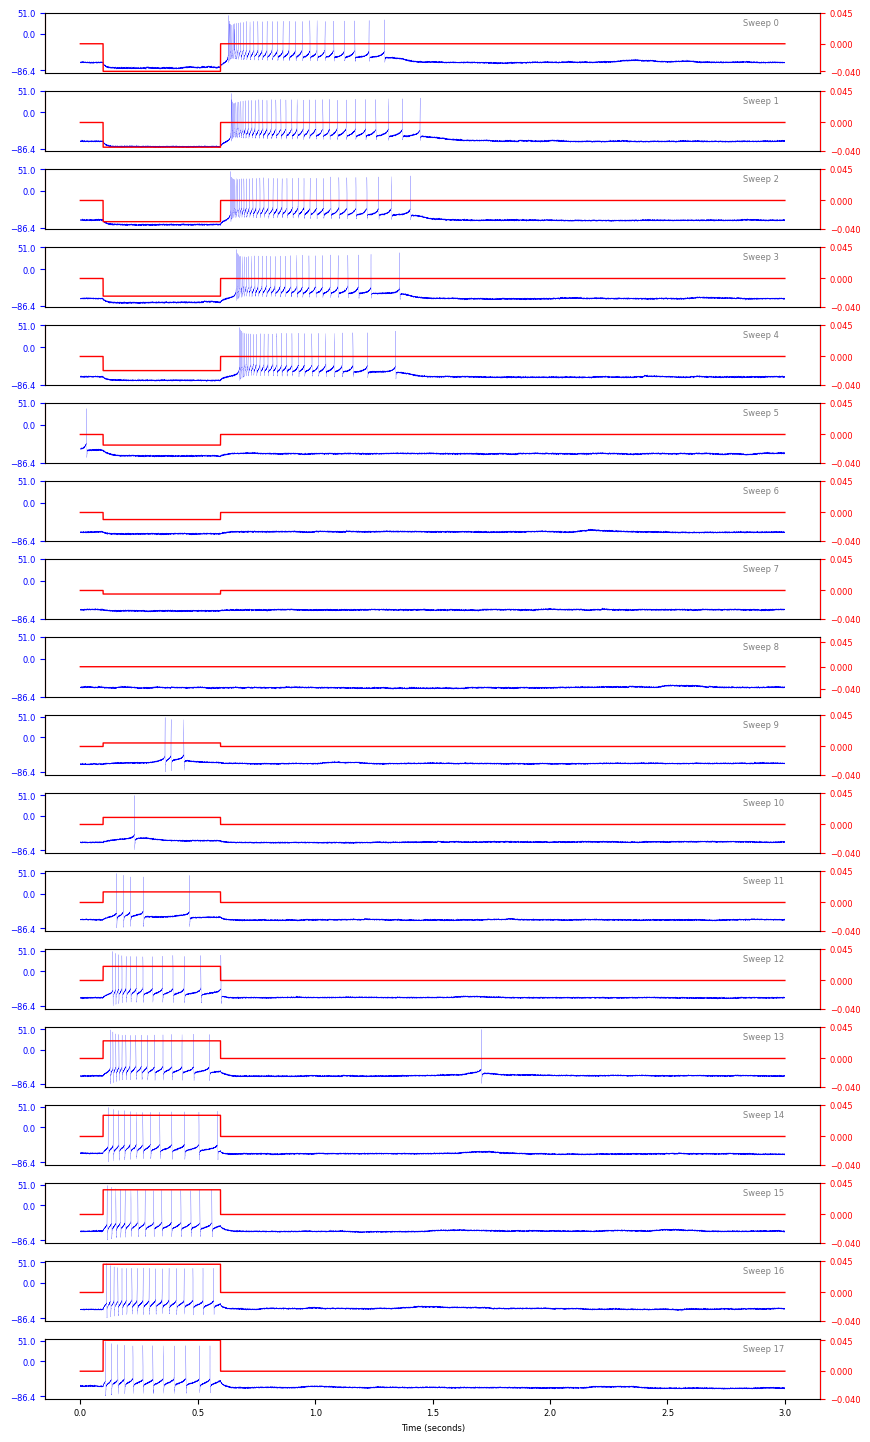

In [11]:
import os
import pyabf
import matplotlib.pyplot as plt
import numpy as np

# Charger le fichier ABF
file_path = "abf_data/Cell1_CC_LHb/23615008.abf"
abf = pyabf.ABF(file_path)

# Initialiser les valeurs globales min et max pour ADC et DAC
global_y_min_left = float('inf')
global_y_max_left = float('-inf')
global_y_min_right = float('inf')
global_y_max_right = float('-inf')

# Trouver les valeurs min et max globales pour tous les sweeps
for sweepNumber in abf.sweepList:
    abf.setSweep(sweepNumber)
    global_y_min_left = min(global_y_min_left, np.min(abf.sweepY))
    global_y_max_left = max(global_y_max_left, np.max(abf.sweepY))
    global_y_min_right = min(global_y_min_right, np.min(abf.sweepC))
    global_y_max_right = max(global_y_max_right, np.max(abf.sweepC))

# Définir le nombre de sous-figures (nombre de sweeps)
n_sweeps = len(abf.sweepList)
fig, axes = plt.subplots(nrows=n_sweeps, ncols=1, figsize=(10, 1 * n_sweeps))

# Assurez-vous que 'axes' soit un tableau, même pour un seul sweep
if n_sweeps == 1:
    axes = [axes]

# Tracer chaque sweep individuellement
for i, sweepNumber in enumerate(abf.sweepList):
    abf.setSweep(sweepNumber)
    ax1 = axes[i]
    ax2 = ax1.twinx()

    # Tracer l'ADC (potentiel de membrane) sur l'axe de gauche
    ax1.plot(abf.sweepX, abf.sweepY, color='b', lw=0.1)  # ADC curve in blue
    ax1.set_yticks([global_y_min_left, 0 if global_y_min_left < 0 < global_y_max_left else None, global_y_max_left])
    ax1.set_yticks([tick for tick in ax1.get_yticks() if tick is not None])  # Remove None values
    ax1.tick_params(axis='y', labelcolor='blue', color='blue', labelsize=6)
    ax1.spines['left'].set_color('r')  # Color the left y-axis blue

    # Tracer le DAC (courant appliqué) sur l'axe de droite
    ax2.plot(abf.sweepX, abf.sweepC, color='r', lw=1)  # DAC curve in red
    ax2.set_yticks([global_y_min_right, 0 if global_y_min_right < 0 < global_y_max_right else None, global_y_max_right])
    ax2.set_yticks([tick for tick in ax2.get_yticks() if tick is not None])  # Remove None values
    ax2.tick_params(axis='y', labelcolor='r', color='r', labelsize=6)
    ax2.spines['right'].set_color('r')  # Color the right y-axis red

    # Ajouter le numéro de sweep comme titre
    ax1.text(0.9, 0.8, f"Sweep {sweepNumber}", transform=ax1.transAxes, fontsize=6, color='gray')

    # Adjust tick label sizes
    ax1.tick_params(axis='x', labelsize=6)  # Adjust the x-axis tick label size

    ax1.spines[['bottom','top']].set_visible(False)

    if i < n_sweeps - 1:
        ax1.xaxis.set_visible(False)  # Suppress x-axis for all but the last subplot
    else:
        ax1.set_xlabel(abf.sweepLabelX, fontsize=6)  # Set x-axis label only for the last subplot     

# Améliorer la mise en page et ajouter de l'espace entre les sous-figures
plt.subplots_adjust(hspace=0.3)
plt.show()


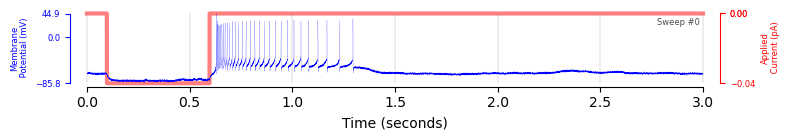

In [24]:
import pyabf
import matplotlib.pyplot as plt
import numpy as np

# Apply the style before creating the plot
# plt.style.use('bmh')

# --- Charger le fichier ABF ---------------------------------------

file_path = "abf_data/Cell1_CC_LHb/23615008.abf"
abf = pyabf.ABF(file_path)

c_min, c_max = min(abf.sweepC), max(abf.sweepC)
t_min, t_max = min(abf.sweepX), max(abf.sweepX)
y_min, y_max = min(abf.sweepY), max(abf.sweepY)

# --- Paramètres ---------------------------------------------------

fig_height, fig_width = 1.5, 8
y_label_font_size = 6
adc_lw, dac_lw = 0.1, 3
adc_col, dac_col = 'b', 'r'
tick_label_font_size = 6

# --- Créer la figure ----------------------------------------------

fig, ax1 = plt.subplots(figsize=(fig_width, fig_height))

# --- ax1 ----------------------------------------------------------

# Tracer la courbe enregistrée (ADC) sur l'axe de gauche
ax1.plot(abf.sweepX, abf.sweepY, color=adc_col, label="ADC waveform", lw=adc_lw)
ax1.set_xlabel(abf.sweepLabelX)
part1_length = 8
ax1.set_ylabel(f"{abf.sweepLabelY[:part1_length]}\n{abf.sweepLabelY[part1_length:]}", color=adc_col, fontsize=y_label_font_size)
ax1.tick_params(axis='y', labelcolor=adc_col, color=adc_col, labelsize=tick_label_font_size)

# Définir les valeurs des ticks y pour l'axe gauche
ticks_left = [tick for tick in [y_min, 0, y_max] if y_min <= tick <= y_max]
ax1.set_yticks(ticks_left)

# Changer la couleur du spine gauche
ax1.spines['left'].set_color(adc_col)
ax1.spines[['right', 'top', 'bottom']].set_visible(False)
ax1.spines['left'].set_bounds(y_min, y_max)

# sweep number
sweep_text = f"Sweep #{abf.sweepNumber}"
ax1.text(0.95, 0.9, sweep_text, transform=ax1.transAxes,
         fontsize=tick_label_font_size, color='k', ha='right', va='top', alpha=0.7)

# --- ax2 ----------------------------------------------------------

# Créer un second axe y pour la courbe de commande (DAC)
ax2 = ax1.twinx()
ax2.plot(abf.sweepX, abf.sweepC, color=dac_col, label="DAC waveform", lw=dac_lw, alpha=0.5)
#ax2.set_ylabel(abf.sweepLabelC, color=dac_col, fontsize=y_label_font_size)
part2_length = 7
ax2.set_ylabel(f"{abf.sweepLabelC[:part2_length]}\n{abf.sweepLabelC[part2_length:]}", color=dac_col, fontsize=y_label_font_size)
ax2.tick_params(axis='y', labelcolor=dac_col, color=dac_col, labelsize=tick_label_font_size)

# Définir les valeurs des ticks y pour l'axe droit
ticks_right = [tick for tick in [c_min, 0, c_max] if c_min <= tick <= c_max]
ax2.set_yticks(ticks_right)

# Changer la couleur du spine droit
ax2.spines['right'].set_color(dac_col)
ax2.spines[['left', 'top']].set_visible(False)
ax2.spines['bottom'].set_bounds(min(abf.sweepX), max(abf.sweepX))
ax2.spines['right'].set_bounds(c_min, c_max)
ax2.spines['bottom'].set_bounds(t_min, t_max)

# --- Améliorer la mise en page --------------------------------------

x_positions = np.linspace(0, 3, 7)  # Adjust the start, end, and number of lines as needed
for x in x_positions:
    ax1.vlines(x, ymin=-85.8, ymax=44.9, color='gray', linestyle='-', linewidth=0.2, zorder=0)

ax1.spines['left'].set_position(('outward', -10))
ax2.spines['right'].set_position(('outward', -10))


ax1.set_zorder(2)
ax2.set_zorder(1)
ax1.patch.set_visible(False)

fig.tight_layout()
plt.show()

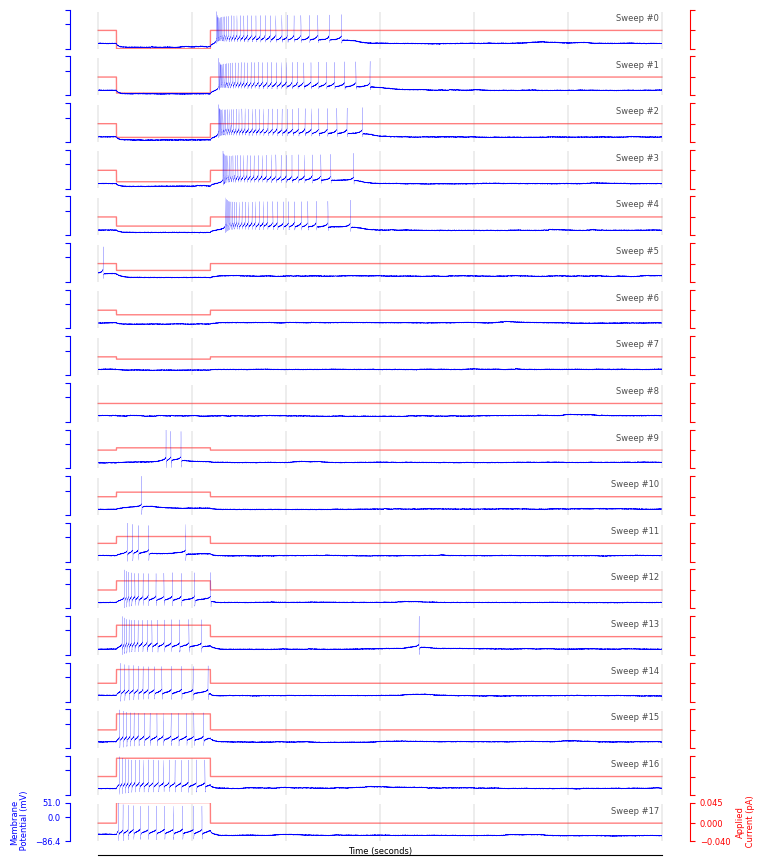

In [58]:
import pyabf
import matplotlib.pyplot as plt
import numpy as np

# Charger le fichier ABF
file_path = "abf_data/Cell1_CC_LHb/23615008.abf"
abf = pyabf.ABF(file_path)

# Paramètres de style
fig_width, fig_height = 8, 0.6
y_label_font_size = 6
adc_lw, dac_lw = 0.1, 1
adc_col, dac_col = 'b', 'r'
tick_label_font_size = 6

# Initialiser les variables de min/max globaux
c_min, c_max = float('inf'), float('-inf')
y_min, y_max = float('inf'), float('-inf')

# Parcourir tous les balayages pour trouver les valeurs globales
for sweep in range(abf.sweepCount):
    abf.setSweep(sweep)
    c_min = min(c_min, min(abf.sweepC))
    c_max = max(c_max, max(abf.sweepC))
    y_min = min(y_min, min(abf.sweepY))
    y_max = max(y_max, max(abf.sweepY))

# Définir t_min et t_max basés sur le premier balayage (ils ne changent pas)
t_min, t_max = abf.sweepX[0], abf.sweepX[-1] 

# Créer une figure avec des sous-figures verticales pour chaque balayage
fig, axes = plt.subplots(abf.sweepCount, 1, figsize=(fig_width, fig_height * abf.sweepCount), sharex=True)

for sweep in range(abf.sweepCount):
    abf.setSweep(sweep)
    ax1 = axes[sweep]

    # <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<

    # --- ax1 ----------------------------------------------------------

    # Tracer la courbe enregistrée (ADC) sur l'axe de gauche
    ax1.plot(abf.sweepX, abf.sweepY, color=adc_col, label="ADC waveform", lw=adc_lw)
    ax1.tick_params(axis='y', labelcolor=adc_col, color=adc_col, labelsize=tick_label_font_size)
    ax1.set_xlabel(abf.sweepLabelX)

    # Définir les valeurs des ticks y pour l'axe gauche
    ticks_left = [tick for tick in [y_min, 0, y_max] if y_min <= tick <= y_max]
    ax1.set_yticks(ticks_left)

    # Spines
    ax1.spines['left'].set_color(adc_col)                     # spine gauche bleu
    ax1.spines[['right', 'top', 'bottom']].set_visible(False) # les autres non visibles
    ax1.spines['left'].set_bounds(y_min, y_max)               # bornes du spine

    # Sweep number
    sweep_text = f"Sweep #{abf.sweepNumber}"
    ax1.text(0.95, 0.9, sweep_text, transform=ax1.transAxes,
         fontsize=tick_label_font_size, color='k', ha='right', va='top', alpha=0.7)
   
    ax1.set_ylim(y_min, y_max)

    # --- ax2 ----------------------------------------------------------

    # Créer un second axe y pour la courbe de commande (DAC)
    ax2 = ax1.twinx()
    ax2.plot(abf.sweepX, abf.sweepC, color=dac_col, label="DAC waveform", lw=dac_lw, alpha=0.5)
    ax2.tick_params(axis='y', labelcolor=dac_col, color=dac_col, labelsize=tick_label_font_size)

    # Définir les valeurs des ticks y pour l'axe droit
    ticks_right = [tick for tick in [c_min, 0, c_max] if c_min <= tick <= c_max]
    ax2.set_yticks(ticks_right)

    # Spines
    ax2.spines['right'].set_color(dac_col)                   # spine droit rouge
    ax2.spines[['left', 'top', 'bottom']].set_visible(False) # les autres non visibles
    ax2.spines['right'].set_bounds(c_min, c_max)             # les bornes des spines
    ax2.spines['bottom'].set_bounds(t_min, t_max)            # 

    ax2.set_ylim(c_min, c_max)

    # --- only the last sweep with x label -------------------------------
    
    if sweep < abf.sweepCount-1:
        ax1.set_yticklabels([]) # no ylabel left
        ax2.set_yticklabels([]) # no ylabel right
        ax1.xaxis.set_visible(False)  # Suppress x-axis for all but the last subplot
        ax1.set_xlabel("")  # no xlabel (ici "Time (seconds)")
        ax1.set_xticks([])  # Hide x-ticks for all but the last sweep
    else:
        #ax1.set_xlabel(abf.sweepLabelX, fontsize=6)  # Set x-axis label only for the last subplot     
        #ax1.set_xticks(ax1.get_xticks())  # Make sure to set the x-ticks visible
        #ax1.set_xlabel(abf.sweepLabelX)   # Set the x-label for the last sweep
        #ax2.spines['bottom'].set_visible(False)
        #ax1.spines['bottom'].set_visible(False)
        #ax2.spines['bottom'].set_position(('outward', 10))  # Décale l'axe x de 10 points vers le bas
        
        # Last sweep, ensure x-axis and ticks are visible
        ax1.set_xlabel(abf.sweepLabelX, fontsize=6)  # Set x-axis label only for the last subplot     
        ax1.set_xticks(ax1.get_xticks())  # Make sure to set the x-ticks visible
        ax1.set_xlabel(abf.sweepLabelX)   # Set the x-label for the last sweep
    
        # Enable bottom spine and position outward for better visibility
        ax2.spines['bottom'].set_visible(True)
        ax2.spines['bottom'].set_position(('outward', 10))  # Décale l'axe x de 10 points vers le bas
    
        # Enable x-ticks for the last subplot explicitly
        ax1.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True)
        ax2.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True)

    # --- Améliorer la mise en page --------------------------------------

    x_positions = np.linspace(0, 3, 7)  # Adjust the start, end, and number of lines as needed
    for x in x_positions:
        ax1.vlines(x, ymin=-85.8, ymax=44.9, color='gray', linestyle='-', linewidth=0.2, zorder=0)
        #ax1.vlines(x, ymin=y_min, ymax=y_max, color='gray', linestyle='-', linewidth=0.2, zorder=0)

    ax1.set_zorder(2)
    ax2.set_zorder(1)
    ax1.patch.set_visible(False)

    # >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
    
ax1.set_xticks(ax1.get_xticks())  # Make sure to set the x-ticks visible
ax1.set_xlabel(abf.sweepLabelX)   # Set the x-label for the last sweep
ax2.spines['bottom'].set_visible(True)
ax2.spines['bottom'].set_bounds(min(abf.sweepX), max(abf.sweepX))

part1_length = 8
ax1.set_ylabel(f"{abf.sweepLabelY[:part1_length]}\n{abf.sweepLabelY[part1_length:]}", color=adc_col, fontsize=y_label_font_size)
part2_length = 7
ax2.set_ylabel(f"{abf.sweepLabelC[:part2_length]}\n{abf.sweepLabelC[part2_length:]}", color=dac_col, fontsize=y_label_font_size)

# Mise en page
#fig.tight_layout()
plt.show()


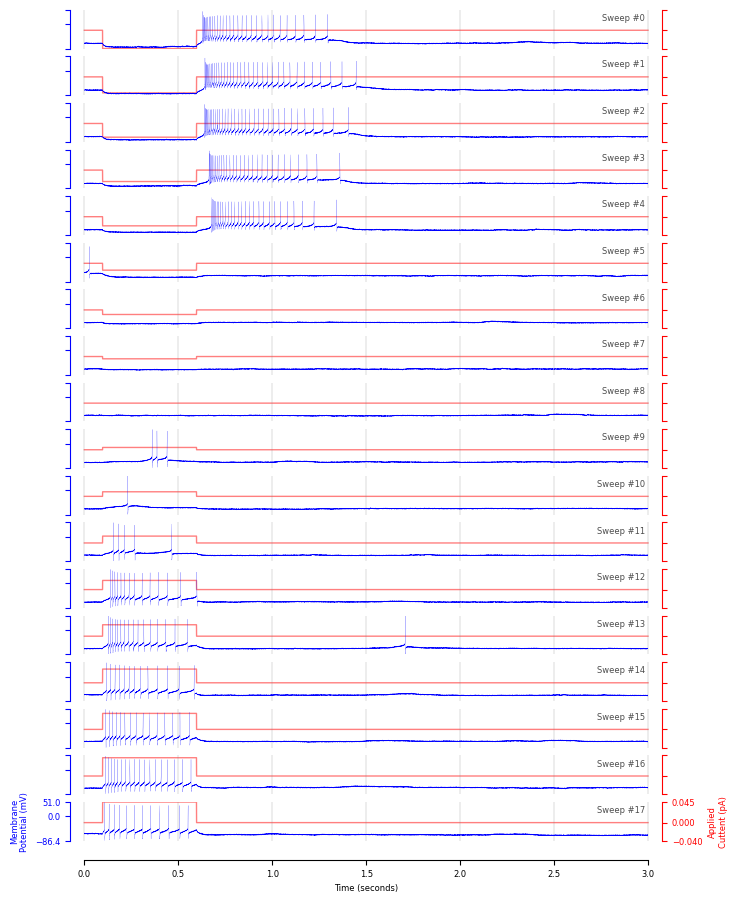

In [2]:
import pyabf
import pyabf.plot
import matplotlib.pyplot as plt
import numpy as np

# Charger le fichier ABF
file_path = "abf_data/Cell1_CC_LHb/23615008.abf"
abf = pyabf.ABF(file_path)

# Paramètres de style
fig_width, fig_height = 8, 0.6
y_label_font_size = 6
adc_lw, dac_lw = 0.1, 1
adc_col, dac_col = 'b', 'r'
tick_label_font_size = 6

# Initialiser les variables de min/max globaux
c_min, c_max = float('inf'), float('-inf')
y_min, y_max = float('inf'), float('-inf')

# Parcourir tous les balayages pour trouver les valeurs globales
for sweep in range(abf.sweepCount):
    abf.setSweep(sweep)
    c_min = min(c_min, min(abf.sweepC))
    c_max = max(c_max, max(abf.sweepC))
    y_min = min(y_min, min(abf.sweepY))
    y_max = max(y_max, max(abf.sweepY))

# Définir t_min et t_max basés sur le premier balayage (ils ne changent pas)
t_min, t_max = abf.sweepX[0], abf.sweepX[-1] 

# Créer une figure avec des sous-figures verticales pour chaque balayage
#   je rajoute un subplot pour tracer l'axe des x (temps)
fig, axes = plt.subplots(abf.sweepCount+1, 1, 
                         figsize=(fig_width, fig_height * (abf.sweepCount+1)), sharex=True)



for sweep in range(abf.sweepCount):

    #<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<

    abf.setSweep(sweep)  # set the sweep
    ax1 = axes[sweep]

    # --- ax1 ----------------------------------------------------------

    # Tracer la courbe enregistrée (ADC) sur l'axe de gauche
    ax1.plot(abf.sweepX, abf.sweepY, color=adc_col, lw=adc_lw)
    ax1.tick_params(axis='y', labelcolor=adc_col, color=adc_col, labelsize=tick_label_font_size)
    ax1.set_xlabel(abf.sweepLabelX)

    # Définir les valeurs des ticks y pour l'axe gauche
    ticks_left = [tick for tick in [y_min, 0, y_max] if y_min <= tick <= y_max]
    ax1.set_yticks(ticks_left)

    # Spines
    ax1.spines['left'].set_color(adc_col)                     # spine gauche bleu
    ax1.spines[['right', 'top', 'bottom']].set_visible(False) # les autres non visibles
    ax1.spines['left'].set_bounds(y_min, y_max)               # bornes du spine

    # Sweep number
    sweep_text = f"Sweep #{abf.sweepNumber}"
    ax1.text(0.95, 0.9, sweep_text, transform=ax1.transAxes,
         fontsize=tick_label_font_size, color='k', ha='right', va='top', alpha=0.7)
   
    ax1.set_ylim(y_min, y_max)

    # --- ax2 ----------------------------------------------------------

    # Créer un second axe y pour la courbe de commande (DAC)
    ax2 = ax1.twinx()
    ax2.plot(abf.sweepX, abf.sweepC, color=dac_col, lw=dac_lw, alpha=0.5)
    ax2.tick_params(axis='y', labelcolor=dac_col, color=dac_col, labelsize=tick_label_font_size)

    # Définir les valeurs des ticks y pour l'axe droit
    ticks_right = [tick for tick in [c_min, 0, c_max] if c_min <= tick <= c_max]
    ax2.set_yticks(ticks_right)

    # Spines
    ax2.spines['right'].set_color(dac_col)                   # spine droit rouge
    ax2.spines[['left', 'top', 'bottom']].set_visible(False) # les autres non visibles
    ax2.spines['right'].set_bounds(c_min, c_max)             # les bornes des spines
    ax2.spines['bottom'].set_bounds(t_min, t_max)            # 
    #ax2.spines['bottom'].set_visible(False)
    ax1.xaxis.set_visible(False)
    ax1.set_xlabel("")                 # no xlabel (ici "Time (seconds)")
    ax1.set_xticks([])                 # Hide x-ticks for all but the last sweep

    ax2.set_ylim(c_min, c_max)
    ax1.set_ylim(y_min, y_max)

    # Only the last sweep with y labels
    if sweep < abf.sweepCount-1:
        # no ylabels left & right
        ax1.set_yticklabels([])
        ax2.set_yticklabels([])
    else:
        # ylabels
        ax1.set_ylabel(f"Membrane\nPotential (mV)", color=adc_col, fontsize=y_label_font_size)
        ax2.set_ylabel(f"Applied\nCuttent (pA)",    color=dac_col, fontsize=y_label_font_size)

    # Améliorer la mise en page
    ax1.spines['left'].set_position(('outward', -10))
    ax2.spines['right'].set_position(('outward', -10))

    x_positions = np.linspace(t_min, t_max, 7)  # Adjust the start, end, and number of lines as needed
    for x in x_positions:
        ax1.vlines(x, ymin=y_min, ymax=y_max, color='gray', linestyle='-', linewidth=0.2, zorder=0)

    ax1.set_zorder(2)
    ax2.set_zorder(1)
    ax1.patch.set_visible(False)

    #>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

# --- Access the last subplot ------------------------------------------

ax_last = axes[abf.sweepCount]
#ax_last.plot(abf.sweepX, abf.sweepY, color=adc_col, lw=adc_lw)


ax_last.spines[['top','left','right']].set_visible(False)
# Set x-axis label for the last subplot
ax_last.set_xlabel(abf.sweepLabelX, fontsize=6)

# Display only x-ticks and remove y-ticks
ax_last.tick_params(axis='x', labelsize=tick_label_font_size)
ax_last.tick_params(axis='y', left=False, labelleft=False)  # Hide y-axis ticks and labels

# Optional: add minor ticks to make the axis look cleaner (remove if not needed)
ax_last.xaxis.set_minor_locator(plt.MultipleLocator(0.5))
ax_last.xaxis.set_tick_params(which='minor', bottom=True)

ax_last.spines['bottom'].set_bounds(t_min, t_max)
ax_last.spines['bottom'].set_position(('outward', -20))  # Décale l'axe x de 10 points vers le bas

custom_xticks = np.linspace(t_min, t_max, num=7)  # Example x-ticks positions
ax_last.set_xticks(custom_xticks)
ax_last.set_xticklabels([f"{tick:.1f}" for tick in custom_xticks], fontsize=tick_label_font_size)  # Custom labels



plt.show()


In [48]:
ax1.get_xticklabels()

[]

In [38]:
abf.sweepEpochs

In [13]:
abf.sweepY

array([-68.0542, -68.0542, -66.8335, ..., -69.5801, -67.749 , -68.0542],
      dtype=float32)

In [32]:
abf.sweepX

array([0.    , 0.0001, 0.0001, ..., 2.9999, 2.9999, 3.    ])

18
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17


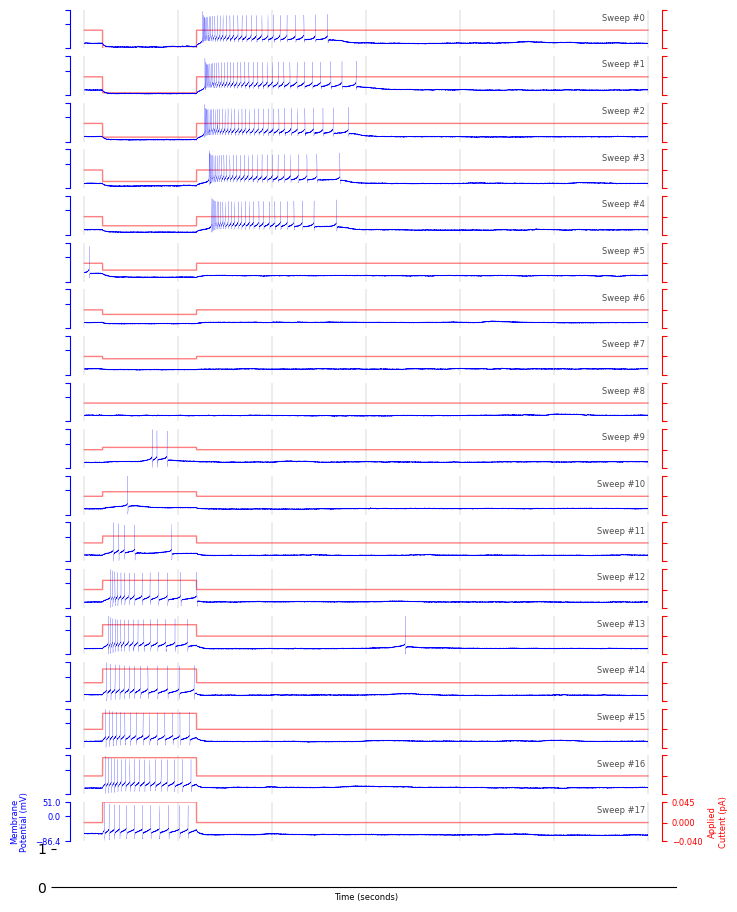

In [11]:
import pyabf
import pyabf.plot
import matplotlib.pyplot as plt
import numpy as np

# Charger le fichier ABF
file_path = "abf_data/Cell1_CC_LHb/23615008.abf"
abf = pyabf.ABF(file_path)

# Paramètres de style
fig_width, fig_height = 8, 0.6
y_label_font_size = 6
adc_lw, dac_lw = 0.1, 1
adc_col, dac_col = 'b', 'r'
tick_label_font_size = 6

# Initialiser les variables de min/max globaux
c_min, c_max = float('inf'), float('-inf')
y_min, y_max = float('inf'), float('-inf')

# Parcourir tous les balayages pour trouver les valeurs globales
for sweep in range(abf.sweepCount):
    abf.setSweep(sweep)
    c_min = min(c_min, min(abf.sweepC))
    c_max = max(c_max, max(abf.sweepC))
    y_min = min(y_min, min(abf.sweepY))
    y_max = max(y_max, max(abf.sweepY))

# Définir t_min et t_max basés sur le premier balayage (ils ne changent pas)
t_min, t_max = abf.sweepX[0], abf.sweepX[-1] 

# Créer une figure avec des sous-figures verticales pour chaque balayage
#   je rajoute un subplot pour tracer l'axe des x (temps)
fig, axes = plt.subplots(abf.sweepCount+1, 1, 
                         figsize=(fig_width, fig_height * (abf.sweepCount+1)), sharex=True)

# --- Access the last subplot ------------------------------------------

print(abf.sweepCount)
ax_last = axes[abf.sweepCount]
ax_last.spines[['top','left','right']].set_visible(False)
ax_last.set_xlabel(abf.sweepLabelX, fontsize=6)

for sweep in range(abf.sweepCount):

    #<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<

    print(sweep)

    abf.setSweep(sweep)  # set the sweep
    ax1 = axes[sweep]

    # --- ax1 ----------------------------------------------------------

    # Tracer la courbe enregistrée (ADC) sur l'axe de gauche
    ax1.plot(abf.sweepX, abf.sweepY, color=adc_col, lw=adc_lw)
    ax1.tick_params(axis='y', labelcolor=adc_col, color=adc_col, labelsize=tick_label_font_size)
    ax1.set_xlabel(abf.sweepLabelX)

    # Définir les valeurs des ticks y pour l'axe gauche
    ticks_left = [tick for tick in [y_min, 0, y_max] if y_min <= tick <= y_max]
    ax1.set_yticks(ticks_left)

    # Spines
    ax1.spines['left'].set_color(adc_col)                     # spine gauche bleu
    ax1.spines[['right', 'top', 'bottom']].set_visible(False) # les autres non visibles
    ax1.spines['left'].set_bounds(y_min, y_max)               # bornes du spine

    # Sweep number
    sweep_text = f"Sweep #{abf.sweepNumber}"
    ax1.text(0.95, 0.9, sweep_text, transform=ax1.transAxes,
         fontsize=tick_label_font_size, color='k', ha='right', va='top', alpha=0.7)
   
    ax1.set_ylim(y_min, y_max)

    # --- ax2 ----------------------------------------------------------

    # Créer un second axe y pour la courbe de commande (DAC)
    ax2 = ax1.twinx()
    ax2.plot(abf.sweepX, abf.sweepC, color=dac_col, lw=dac_lw, alpha=0.5)
    ax2.tick_params(axis='y', labelcolor=dac_col, color=dac_col, labelsize=tick_label_font_size)

    # Définir les valeurs des ticks y pour l'axe droit
    ticks_right = [tick for tick in [c_min, 0, c_max] if c_min <= tick <= c_max]
    ax2.set_yticks(ticks_right)

    # Spines
    ax2.spines['right'].set_color(dac_col)                   # spine droit rouge
    ax2.spines[['left', 'top', 'bottom']].set_visible(False) # les autres non visibles
    ax2.spines['right'].set_bounds(c_min, c_max)             # les bornes des spines
    ax2.spines['bottom'].set_bounds(t_min, t_max)            # 
    #ax2.spines['bottom'].set_visible(False)
    ax1.xaxis.set_visible(False)
    ax1.set_xlabel("")                 # no xlabel (ici "Time (seconds)")
    ax1.set_xticks([])                 # Hide x-ticks for all but the last sweep

    ax2.set_ylim(c_min, c_max)
    ax1.set_ylim(y_min, y_max)

    # Only the last sweep with y labels
    if sweep < abf.sweepCount-1:
        # no ylabels left & right
        ax1.set_yticklabels([])
        ax2.set_yticklabels([])
    else:
        # ylabels
        ax1.set_ylabel(f"Membrane\nPotential (mV)", color=adc_col, fontsize=y_label_font_size)
        ax2.set_ylabel(f"Applied\nCuttent (pA)",    color=dac_col, fontsize=y_label_font_size)

    # Améliorer la mise en page
    ax1.spines['left'].set_position(('outward', -10))
    ax2.spines['right'].set_position(('outward', -10))

    x_positions = np.linspace(t_min, t_max, 7)  # Adjust the start, end, and number of lines as needed
    for x in x_positions:
        ax1.vlines(x, ymin=y_min, ymax=y_max, color='gray', linestyle='-', linewidth=0.2, zorder=0)

    ax1.set_zorder(2)
    ax2.set_zorder(1)
    ax1.patch.set_visible(False)

    #>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

plt.show()
